# Machine Learning

### Predicting Car Seats using KNN Model

# Load ML Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
car = pd.read_csv("carseats.csv")
car['Class']= np.where(car['Sales'] >= 8, 1, 0)
# removing sales to predict above Sales 8
car = car.drop(["Sales"], axis= 1)
car.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


## Convert strings to integers dummies

In [23]:
car = pd.get_dummies(car, columns=["ShelveLoc", 'Urban', 'US'])
car.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Class,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [24]:
car.dtypes

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Class               int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
US_No               uint8
US_Yes              uint8
dtype: object

# Split Data into Training and Test

In [25]:
X=car.drop('Class',axis=1)
y=car['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=5)


In [27]:
print("X Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)

X Train: (280, 14) 
X Test: (120, 14) 
 
y Train: (280,) 
y Test: (120,)


# Scale Data

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### Check mean of all columns = 0 and standard deviation of all columns = 1

In [29]:
print("Mean:\n",
      np.round(np.mean(X_train_scaled,axis=0),1),
      "\nStandard Deviation:\n",
      np.round(np.std(X_train_scaled,axis=0),1))

Mean:
 [-0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.] 
Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Logistic Regression

In [72]:
log=LogisticRegression(random_state=0)

log_mod_scaled = log.fit(X_train_scaled,y_train)
log_mod = log.fit(X_train,y_train)

print("the Coefficient is:\n",log_mod_scaled.coef_,"\n") 
print("the Intercept is:\n",log_mod_scaled.intercept_)

print("\nthe Coefficient is:\n",log_mod.coef_,"\n") 
print("the Intercept is:\n",log_mod.intercept_)

the Coefficient is:
 [[ 1.18084962e-01  2.69834987e-02  2.57738474e-01 -2.42089867e-03
  -1.25998518e-01 -6.68830039e-02  2.99083885e-02 -2.54317437e+00
   2.95187807e+00 -5.43772234e-01  3.42114995e-01 -4.77183527e-01
   3.01591009e-01 -4.36659540e-01]] 

the Intercept is:
 [-0.14595142]

the Coefficient is:
 [[ 1.18084962e-01  2.69834987e-02  2.57738474e-01 -2.42089867e-03
  -1.25998518e-01 -6.68830039e-02  2.99083885e-02 -2.54317437e+00
   2.95187807e+00 -5.43772234e-01  3.42114995e-01 -4.77183527e-01
   3.01591009e-01 -4.36659540e-01]] 

the Intercept is:
 [-0.14595142]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print('The Accuracy Score With Scaled is:',
      accuracy_score(log_mod_scaled.predict(X_test_scaled),y_test))
print('The Accuracy Score Without Scaled is:',
      accuracy_score(log_mod.predict(X_test),y_test))

The Accuracy Score With Scaled is: 0.6
The Accuracy Score Without Scaled is: 0.8833333333333333


### Analysis: the accuracy of logisitc model is 0.558 which might let us try different model since its aprox of 50% accurate and we hope to have 70% or above to prove its perfomrmance. However, when we predict the scaled test data we get higher accuracy score of 0.85. 

# K-Nearest Neighbors and Cross Validation

###  No Scale

Text(0, 0.5, 'Acc')

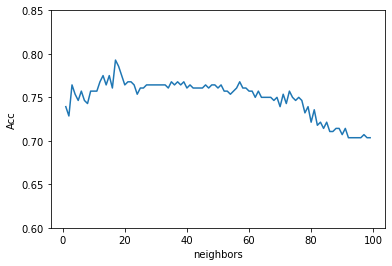

In [87]:

cvres=[]
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())
    
plt.plot(list(range(1,100)),cvres)
plt.xlabel('neighbors')
plt.ylim(.6,0.85)
plt.ylabel('Acc')

Text(0, 0.5, 'Acc')

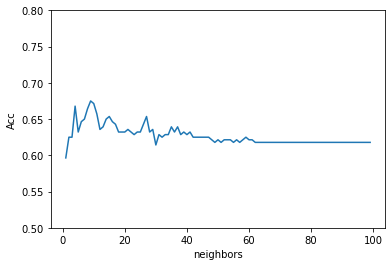

In [88]:
cvres_scaled=[]
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')
    cvres_scaled.append(nn['test_score'].mean())
    
plt.plot(list(range(1,100)),cvres_scaled)
plt.xlabel('neighbors')
plt.ylim(.5,0.8)
plt.ylabel('Acc')




In [91]:
number_list = cvres
max_value = max(number_list)
max_index = number_list.index(max_value)+1

number_list_scaled = cvres_scaled
max_value_scaled = max(number_list_scaled)
max_index_scaled = number_list_scaled.index(max_value_scaled)+1


print("Neighbors: ", max_index, "\nAccuracy: ", max_value)
print("Neighbors: ", max_index_scaled, "\nAccuracy: ", max_value_scaled)

Neighbors:  17 
Accuracy:  0.7928571428571429
Neighbors:  9 
Accuracy:  0.675


In [97]:
mod_scaled = KNeighborsClassifier(n_neighbors=max_index_scaled).fit(X_train_scaled,y_train)

In [98]:
mod = KNeighborsClassifier(n_neighbors=max_index).fit(X_test,y_test)

In [100]:
print("The Accuracy Score - With Scale:",
      accuracy_score(mod_scaled.predict(X_test_scaled),y_test))
print("The Accuracy Score - Without Scale:",
      accuracy_score(mod.predict(X_test),y_test))

The Accuracy Score - With Scale: 0.6833333333333333
The Accuracy Score - Without Scale: 0.6416666666666667


#### **Analysis:**
As we can see we have build a KNN model and used Cross Validation on 100 folds to show how the model is decreasing after the max neighbors which is 17. We have test the the model on two different datasets and that is by Scaleling X and without Scaling. The Accuracy results of Scaling X is 68.3% and it is higher than none Scaled X data 64% by a very little different.

Conclusion, the accuracy score of Logistic Model is 85% accuracy  compared to KNN of 67.5% which means that logistics perform well on categorical variables unlike KNN model is limited for this dataset